# Data Analysis of UPI Transactions For a Year

## 1. Importing the librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## 2. Reading the Dataset And Seeing the Structure

In [2]:
upi = pd.read_csv("upi_transactions.csv")

In [3]:
upi_dup = upi.copy()

In [4]:
upi_dup.head()

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23


From the above table we can see that there are two Date Columns and both have the same information, therefore it is better to drop one of them. Also the first row just contains NaNs, therefore we should not have this row in our dataset.

In [5]:
# Checking the datatypes and potentially checking the null values.
upi_dup.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1470 entries, 0 to 1469

Data columns (total 7 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   Date        1469 non-null   object 

 1   Category    1469 non-null   object 

 2   RefNo       1469 non-null   object 

 3   Date.1      1469 non-null   object 

 4   Withdrawal  1469 non-null   float64

 5   Deposit     1469 non-null   float64

 6   Balance     1469 non-null   float64

dtypes: float64(3), object(4)

memory usage: 80.5+ KB


We can see that fortunately the data collected is very good as it does not contain any Null values. 

There are total 1470 Entries in the dataset, with 7 Columns.

One potential issue here is that the Date column is of _object_ type. So for further analysis it is necessary to convert it to _datetime_ format

In [6]:
upi_dup.describe()

,Withdrawal,Deposit,Balance
count,1469.000000,1469.000000,1469.000000
mean,389.159837,385.247277,5524.807556
std,1622.116130,3061.489157,7347.341934
min,0.000000,0.000000,0.150000
25%,25.000000,0.000000,747.550000
50%,50.000000,0.000000,1955.740000
75%,138.000000,0.000000,7701.620000
max,21000.000000,34800.000000,36119.740000


From above Statistics of the data we can certainly say that there is a lot of variation in the data, indicated by the large values of Standard Deviation. Also the maximum value for each of the column is very huge than even the 3rd Quartile. Therefore the dataset might potentially be Skewed to the left(_left-skewed_). 
Therefore while plotting it we might want to use the log_scale.


## 3. Selecting Columns for Analysis

In [7]:
#handling the unnecessary Columns of Date and RefNo
upi_dup = upi_dup[['Date', 'Category', 'Withdrawal', 'Deposit', 'Balance']]

In [8]:
#Handiling the first row full of NaNs
upi_dup = upi_dup[1:]

## 4. Plotting The Graphs 

### 1. Analysing the Spending Pattern

In [9]:
# High variance and huge difference between max value and 3rd Quartile Shows that the dataset might be left skewed
upi_dup["Withdrawal"].describe()

count     1469.000000
mean       389.159837
std       1622.116130
min          0.000000
25%         25.000000
50%         50.000000
75%        138.000000
max      21000.000000
Name: Withdrawal, dtype: float64

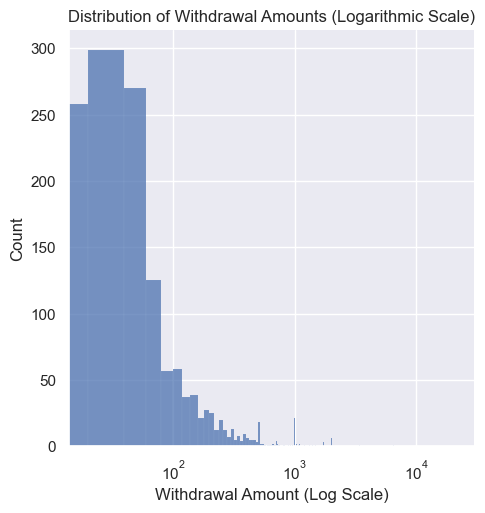

In [10]:
sns.displot(data = upi_dup,x = "Withdrawal")  # Use 'kde' for kernel density estimation
plt.xscale('log')  # Apply logarithmic scale to the Y-axis
plt.xlabel('Withdrawal Amount (Log Scale)')
plt.title('Distribution of Withdrawal Amounts (Logarithmic Scale)')
plt.show()

As Expected the dataset is **left skewed**, indicating that there are very few transactions that are of very high value. Most of the transactions are for small value purchases. 

### Analysing Category Wise Spending

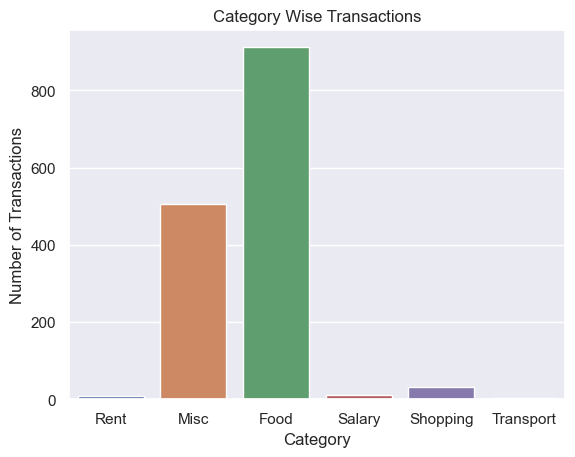

In [11]:
sns.countplot(data = upi_dup, x = "Category")
plt.ylabel("Number of Transactions")
plt.title("Category Wise Transactions")
plt.show()

Above plot clearly shows that most of the transactions are for _Food_ and _Miscellaneous_ purchases.

Let's Analyse the top 4 categories and their percentage share as well

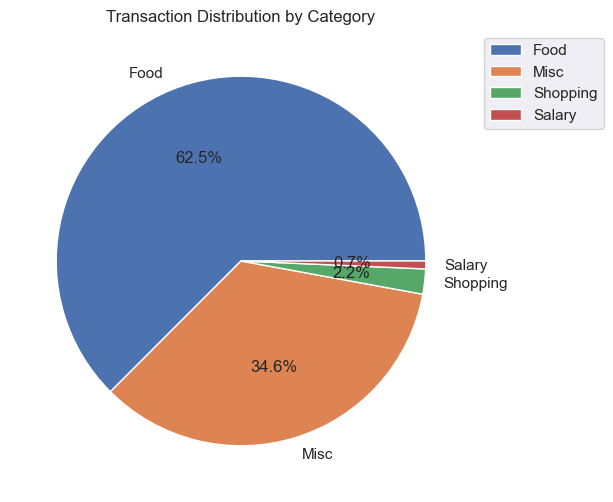

In [12]:
transaction_counts = upi_dup['Category'].value_counts()
top_4_transaction = transaction_counts.head(4)
plt.figure(figsize=(8, 6))
plt.pie(top_4_transaction, labels=top_4_transaction.index, autopct="%1.1f%%")
plt.title("Transaction Distribution by Category")
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

The Top 4 Categories are as follows:

    1. Food(62.5%)
    2. Misc(34.6%)
    3. Shopping(2.2%)
    4. Salary(0.7%)
    

### 3. Analysing the Data Based on Dates

In [13]:
# Converting Object type to datetime datatype
upi_dup['Date'] = pd.to_datetime(upi_dup["Date"])

**Adding a Month Column to analyse the monthly spending**

In [14]:
upi_dup['Month'] = upi_dup["Date"].dt.month

In [15]:
upi_dup.head()

,Date,Category,Withdrawal,Deposit,Balance,Month
1,2023-01-01,Rent,3950.0,0.0,1837.23,1
2,2023-03-01,Misc,105.0,0.0,1732.23,3
3,2023-03-01,Misc,0.0,55.0,1787.23,3
4,2023-03-01,Food,56.0,0.0,1731.23,3
5,2023-03-01,Misc,1.0,0.0,1730.23,3


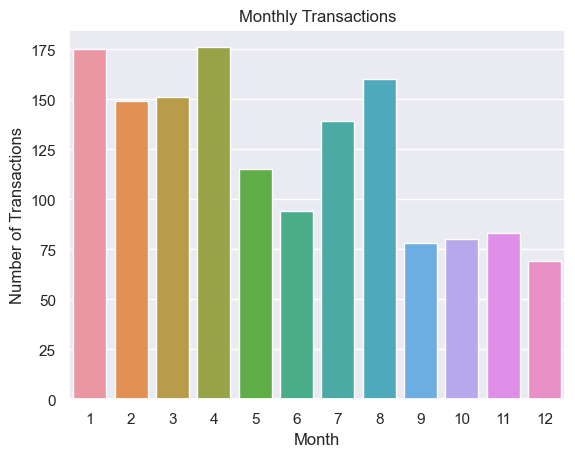

In [16]:
sns.countplot(data = upi_dup, x = "Month")
plt.ylabel("Number of Transactions")
plt.title("Monthly Transactions")
plt.show()

From the Above plot we can see that the April, January and August have the most number of transactions.

Another insight we get is that the months of June, September, October, November and December have a surprisingly low number of transactions

**What are the monthly category wise transactions?** 

let's plot a stacked barplot to look at it

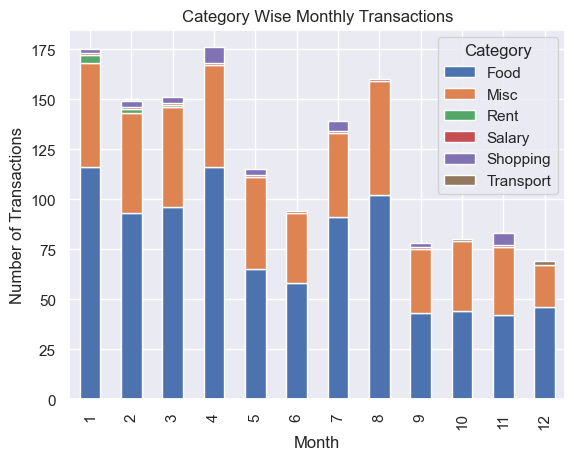

In [17]:
upi_grouped = upi_dup.groupby(['Month', 'Category'])['Withdrawal'].count().unstack()
upi_grouped.plot(kind = "bar", stacked = True)
plt.title("Category Wise Monthly Transactions")
plt.ylabel("Number of Transactions")
plt.show()

The trend of food being the biggest category of spending continues in every month. 

Other than that another trend I see is that the amount spend for Shopping in April is largest, followed by November. The trend from november might be from the fact that Last Year Diwali was in November.

**Let's see this trend more clearly by just ploting shopping transactions per month**

In [18]:
shopping_df = upi_dup[upi_dup["Category"] == "Shopping"]

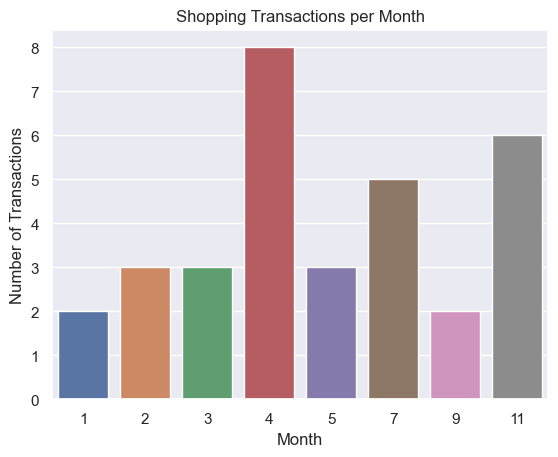

In [19]:
sns.countplot(data = shopping_df, x = "Month")
plt.title("Shopping Transactions per Month")
plt.ylabel("Number of Transactions")
plt.show()

**What about Food Transactions?** 

Let's plot the food transactions per month:

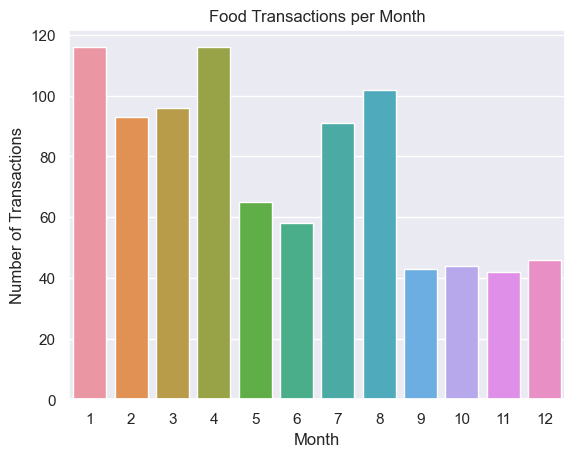

In [20]:
food_df = upi_dup[upi_dup["Category"] == "Food"]
sns.countplot(data = food_df, x = "Month")
plt.title("Food Transactions per Month")
plt.ylabel("Number of Transactions")
plt.show()

They follow the same trend as the total number of transactions. It was expected as contributes to almost **62%** of the total transactions.

### Analysing the data for Weekend and Weekday Purchases
Is the spending more on Weekdays or on Weekends?

In [21]:
#Creating a separate Column for the Day from the Date Column
upi_dup['day_of_week'] = upi_dup['Date'].dt.day_name()
#Creating a mask for weekday and weekends
weekday_mask = upi_dup['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
weekend_mask = upi_dup['day_of_week'].isin(['Saturday', 'Sunday'])
#Modifying the database to reflect weekday or weekend
upi_dup.loc[weekday_mask, 'day_of_week'] = 'weekday'
upi_dup.loc[weekend_mask, 'day_of_week'] = 'weekend'

upi_dup.head()

,Date,Category,Withdrawal,Deposit,Balance,Month,day_of_week
1,2023-01-01,Rent,3950.0,0.0,1837.23,1,weekend
2,2023-03-01,Misc,105.0,0.0,1732.23,3,weekday
3,2023-03-01,Misc,0.0,55.0,1787.23,3,weekday
4,2023-03-01,Food,56.0,0.0,1731.23,3,weekday
5,2023-03-01,Misc,1.0,0.0,1730.23,3,weekday


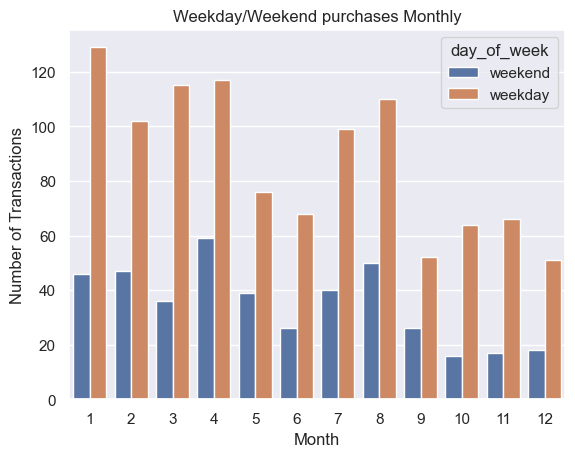

In [22]:
sns.countplot(data = upi_dup, x = "Month", hue = "day_of_week")
plt.title("Weekday/Weekend purchases Monthly")
plt.ylabel("Number of Transactions")
plt.show()

**Surprising there are more purchases on weekdays then on weekends**

One reason for this might be the fact that most of the transactions are for food and misc. Also this are transaction of a technology that has become very accessible. And daily purchases are almost always made by UPI payments. That is why number of transactions are more for weekdays than weekends

**lets see this chart for food transactions and shopping transactions**

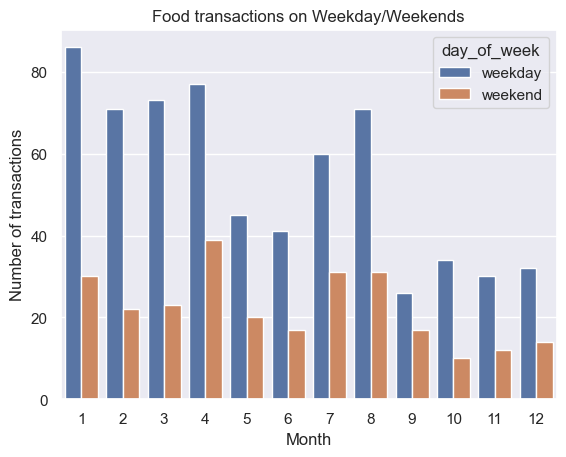

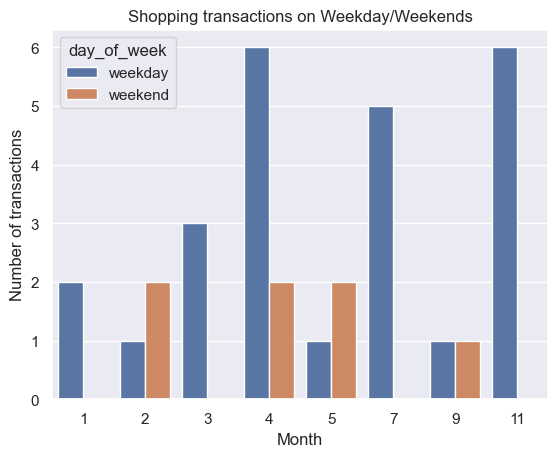

In [23]:
food_df = upi_dup[upi_dup["Category"] == "Food"]
shopping_df = upi_dup[upi_dup["Category"] == "Shopping"]

sns.countplot(data = food_df, x = "Month", hue = "day_of_week")
plt.title("Food transactions on Weekday/Weekends")
plt.ylabel("Number of transactions")
plt.show()

sns.countplot(data = shopping_df, x = "Month", hue = "day_of_week")
plt.title("Shopping transactions on Weekday/Weekends")
plt.ylabel("Number of transactions")
plt.show()

**Going a step further, analysing the transaction frequency for each day of the week**

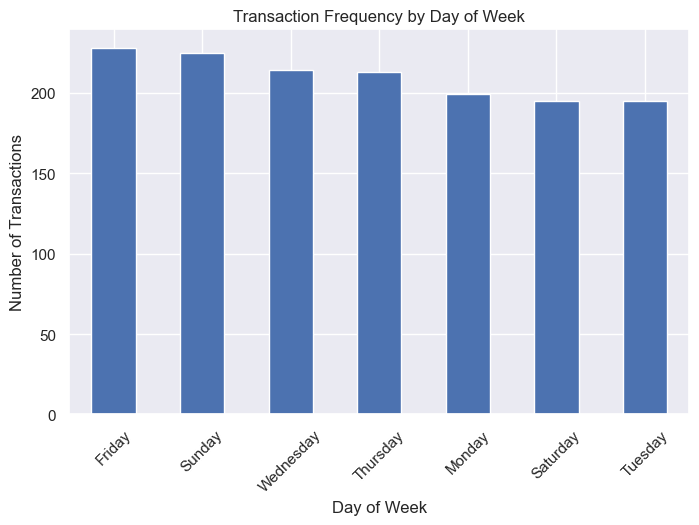

In [24]:
upi_dup['day'] = upi_dup['Date'].dt.day_name()
day_counts = upi_dup['day'].value_counts()

plt.figure(figsize = (8,5))
day_counts.plot(kind = "bar")
plt.xlabel("Day of Week")
plt.ylabel("Number of Transactions")
plt.title("Transaction Frequency by Day of Week")
plt.xticks(rotation = 45)
plt.show()

So we can see that most number of transactions occur on Friday, followed by Sunday and Wednesday. The lease number of transactions occur on Tuesday. Although there is not much difference between the number of transactions. Therefore it is fair to conclude that the number of transactions are fairly distributed over each day.

**Let's Analyse the same but now category wise**

<Figure size 1500x1500 with 0 Axes>

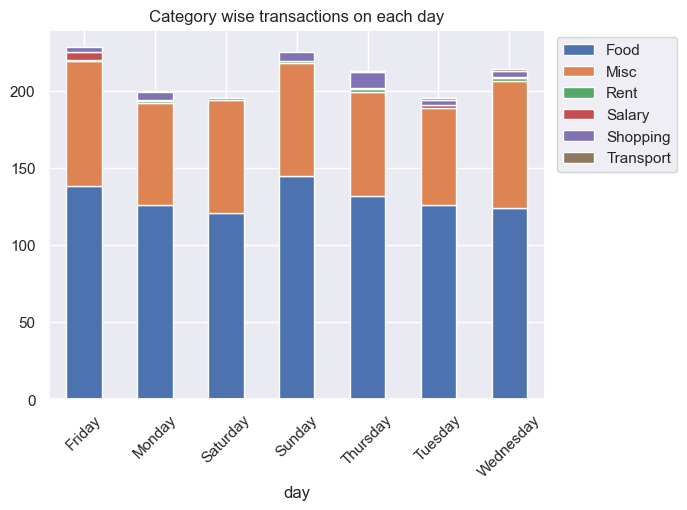

In [25]:
upi_grouped_day = upi_dup.groupby(['day', 'Category'])['Withdrawal'].count().unstack()

plt.figure(figsize=(15,15))
upi_grouped_day.plot(kind = "bar", stacked = True)
plt.title("Category wise transactions on each day")
plt.legend(bbox_to_anchor=(1.01, 1))
plt.xticks(rotation = 45)
plt.show()

So we can see that most amount of shopping is done on Thurdays, followed by Sunday. Further Rent payment is also mostly done on Thursdays. And Salary is mostly paid on Mondays and Tuesdays.

### Lastly Analysing the Average Monthly balance in the account

In [26]:
monthly_balance = upi_dup.groupby('Month')['Balance'].mean()  # Calculate average balance per month


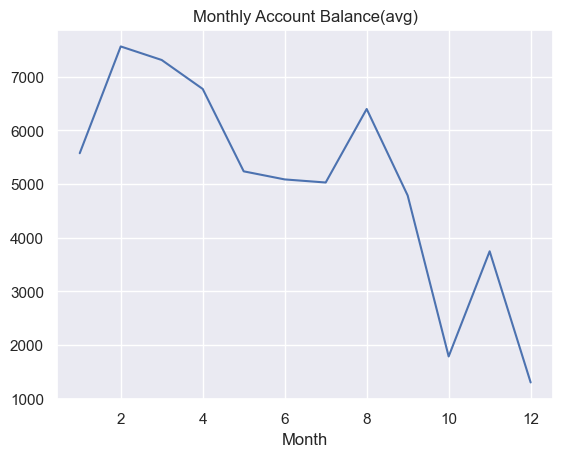

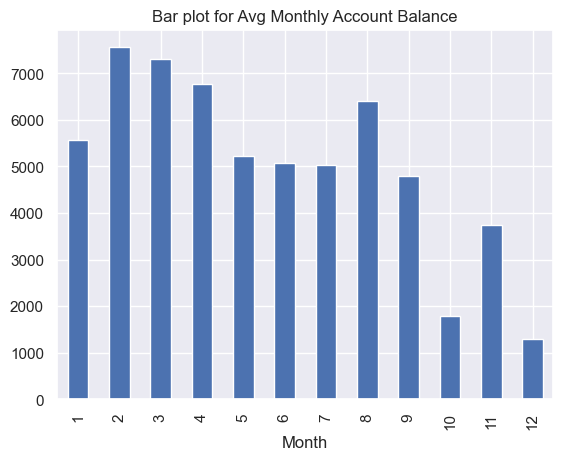

In [27]:
sns.lineplot(x=monthly_balance.index, y=monthly_balance.values)
plt.title("Monthly Account Balance(avg)")
plt.show()

monthly_balance.plot(kind="bar")
plt.title("Bar plot for Avg Monthly Account Balance")
plt.show()